In [1]:
import csv
import numpy
import pandas as pd;
import warnings
warnings.filterwarnings("ignore")

In [2]:
fileName = r'C:\Users\Joshk\Downloads\stock-analysis-master\prices-split-adjusted.csv'
df = pd.read_csv(fileName)
df.apply(lambda x: sum(x.isnull()), axis=0)   # Checking for null values

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [3]:
symbol = df.symbol.unique()
execute = True
while execute:
    sym = input('Enter symbol of share?')         #Input stock name from user
    if sym in symbol:
        execute = False
    else:
        print("Enter a valid share symbol") 

Enter symbol of share?EBAY


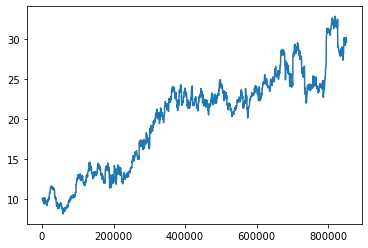

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df1 = df[df.symbol.apply(lambda x:x==sym)] # Retrieving data of that particular share
plt.plot(df1.index,df1.close)

In [5]:
df2 = df1.loc[:,'open':] # Considering important columns
df2.head()

,open,close,low,high,volume
389,9.983165,10.058923,9.941077,10.092592,22511600.0
857,10.012626,9.953704,9.890572,10.058923,26683100.0
1325,9.945285,9.890572,9.865320,10.016835,26368600.0
1793,9.886364,9.776935,9.751683,9.886364,25220000.0
2261,9.760101,9.894781,9.722222,9.949495,30484000.0


In [8]:
days = 22                            # Creating features based on last 22 days of data
df3 = pd.DataFrame()
rows = df2.shape[0]
for i in range(1,rows-days):
    s = pd.Series()
    for j in range(i,i+days):
        s = s.append(df2.iloc[j,:])
    df4 = pd.DataFrame(s)
    df3 = df3.append(df4.transpose())
df3.head() 
df3 = df3.reset_index(drop=True)
df3.shape

(1739, 110)

In [9]:
y = pd.DataFrame()
y = df2.close[days+1:]
y = y.transpose()
y = y.reset_index(drop=True)
y.head()   

0    9.558080
1    9.465488
2    9.414982
3    9.242424
4    9.313973
Name: close, dtype: float64

In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression(normalize=True)         #  Using Linear Regression model
test_days = 30
train = df3.shape[0]-test_days
x_train = df3.iloc[0:train]            # Dividng training and tesing data
x_train.head() 

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,10.012626,9.953704,9.890572,10.058923,26683100.0,9.945285,9.890572,9.865320,10.016835,26368600.0,...,9.667508,9.776935,9.629630,9.810606,34180600.0,9.659091,9.448653,9.427609,9.802189,46628000.0
1,9.945285,9.890572,9.865320,10.016835,26368600.0,9.886364,9.776935,9.751683,9.886364,25220000.0,...,9.659091,9.448653,9.427609,9.802189,46628000.0,9.436026,9.558080,9.360269,9.591751,37072700.0
2,9.886364,9.776935,9.751683,9.886364,25220000.0,9.760101,9.894781,9.722222,9.949495,30484000.0,...,9.436026,9.558080,9.360269,9.591751,37072700.0,9.566498,9.465488,9.448653,9.659091,20112600.0
3,9.760101,9.894781,9.722222,9.949495,30484000.0,9.903198,9.869529,9.785354,9.995791,18331000.0,...,9.566498,9.465488,9.448653,9.659091,20112600.0,9.583333,9.414982,9.360269,9.638047,28657400.0
4,9.903198,9.869529,9.785354,9.995791,18331000.0,9.844276,9.760101,9.663299,9.865320,25572100.0,...,9.583333,9.414982,9.360269,9.638047,28657400.0,9.389730,9.242424,9.154040,9.423401,37093100.0


In [11]:
y_train = y.iloc[0:train]
model.fit(x_train, y_train) # Fitting Linear Model

LinearRegression(normalize=True)

In [12]:
x_test = df3.iloc[train+1:]
y_test = pd.Series(model.predict(x_test))     # Predicting the Linear Model
y_actual = y.iloc[train+1:]
mean_squared_error(y_test,y_actual) #Mean Squared Error of Test Data

0.1716354656890328

In [13]:
[y_test] # Model Predicted Values

[0     28.864610
 1     28.523201
 2     28.808290
 3     29.139882
 4     28.944795
 5     29.228686
 6     28.415522
 7     28.537839
 8     27.871520
 9     27.244089
 10    28.339272
 11    28.295497
 12    28.234546
 13    28.943519
 14    29.435276
 15    29.948487
 16    30.195773
 17    29.772048
 18    29.499885
 19    29.757403
 20    29.784104
 21    29.357162
 22    29.169578
 23    29.308223
 24    29.488987
 25    29.726415
 26    30.270522
 27    30.098766
 28    29.911862
 dtype: float64]

In [14]:
y_actual=y_actual.reset_index(drop=True)
y_test= y_test.reset_index(drop=True)
y_actual.head()

0    28.690001
1    29.000000
2    29.059999
3    28.900000
4    28.950001
Name: close, dtype: float64

In [15]:
y_test.head() 

0    28.864610
1    28.523201
2    28.808290
3    29.139882
4    28.944795
dtype: float64

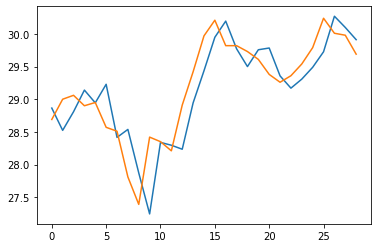

In [16]:
plt.plot(y_test)          # Comparing test predictions with actual data
plt.plot(y_actual)        # Blue - y_test and Orange - y_actual

In [17]:
r2_score(y_test,y_actual) #r2 score of model

0.6774523443176987

In [18]:
y_train_test = pd.Series(model.predict(x_train))
mean_squared_error(y_train,y_train_test)          #Mean Squared Error of Training Data


0.1208818108941985

In [19]:
r2_score(y_train,y_train_test)                   #r2_score of Training Data

0.9966835072238629

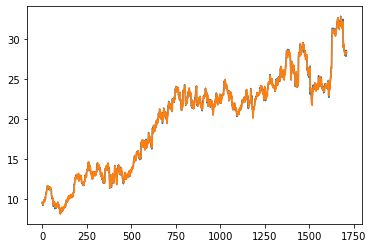

In [20]:
y_train = y_train.reset_index(drop=True)
y_train_test = y_train_test.reset_index(drop=True)
plt.plot(y_train)
plt.plot(y_train_test)            #Visualization of Predictions vs Actual Data

In [21]:
x_train_squared = x_train**2           # Making the training features squared for Ploynomial Regression 
x_poly_train = pd.concat([x_train, x_train_squared], axis=1)
x_poly_train = x_poly_train.reset_index(drop=True)
x_poly_train.head() # Features for polynomial regression model

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,10.012626,9.953704,9.890572,10.058923,26683100.0,9.945285,9.890572,9.865320,10.016835,26368600.0,...,93.460711,95.588462,92.729767,96.247983,1.168313e+15,93.298037,89.277039,88.879812,96.082900,2.174170e+15
1,9.945285,9.890572,9.865320,10.016835,26368600.0,9.886364,9.776935,9.751683,9.886364,25220000.0,...,93.298037,89.277039,88.879812,96.082900,2.174170e+15,89.038588,91.356901,87.614642,92.001684,1.374385e+15
2,9.886364,9.776935,9.751683,9.886364,25220000.0,9.760101,9.894781,9.722222,9.949495,30484000.0,...,89.038588,91.356901,87.614642,92.001684,1.374385e+15,91.517890,89.595467,89.277039,93.298037,4.045167e+14
3,9.760101,9.894781,9.722222,9.949495,30484000.0,9.903198,9.869529,9.785354,9.995791,18331000.0,...,91.517890,89.595467,89.277039,93.298037,4.045167e+14,91.840270,88.641892,87.614642,92.891945,8.212466e+14
4,9.903198,9.869529,9.785354,9.995791,18331000.0,9.844276,9.760101,9.663299,9.865320,25572100.0,...,91.840270,88.641892,87.614642,92.891945,8.212466e+14,88.167034,85.422398,83.796448,88.800480,1.375898e+15


In [22]:
x_test_squared = x_test**2          # Making the test features squared for Ploynomial Regression
x_poly_test = pd.concat([x_test, x_test_squared], axis=1)
x_poly_test = x_poly_test.reset_index(drop=True)
x_poly_test.head() 

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,31.910000,32.520000,31.719999,32.639999,23765800.0,29.500000,29.020000,28.750000,29.840000,52625200.0,...,805.992043,802.588900,801.456043,834.632042,8.192965e+13,804.856957,833.476958,803.7225,836.366400,7.902677e+13
1,29.500000,29.020000,28.750000,29.840000,52625200.0,29.059999,29.059999,28.600000,29.190001,24223500.0,...,804.856957,833.476958,803.722500,836.366400,7.902677e+13,831.745600,823.116157,816.2449,838.102558,1.210638e+14
2,29.059999,29.059999,28.600000,29.190001,24223500.0,29.260000,29.219999,29.150000,29.709999,16402300.0,...,831.745600,823.116157,816.244900,838.102558,1.210638e+14,825.412900,841.000000,821.9689,849.139542,5.435081e+13
3,29.260000,29.219999,29.150000,29.709999,16402300.0,29.200001,29.049999,28.940001,29.389999,9739900.0,...,825.412900,841.000000,821.968900,849.139542,5.435081e+13,866.713659,844.483542,836.9449,866.713659,5.353410e+13
4,29.200001,29.049999,28.940001,29.389999,9739900.0,29.000000,28.820000,28.770000,29.049999,8427400.0,...,866.713659,844.483542,836.944900,866.713659,5.353410e+13,840.420100,835.210000,820.8225,845.064900,3.627412e+13


In [23]:
poly_model = linear_model.LinearRegression(normalize=True)  
poly_model.fit(x_poly_train, y_train)                # Fitting a Polynomial Regression Model with Squared Features

LinearRegression(normalize=True)

In [24]:
y_poly_predict = pd.Series(poly_model.predict(x_poly_test))
mean_squared_error(y_poly_predict,y_actual) #Mean Squared Error of Polynomial Regression Model

0.21803635526004897

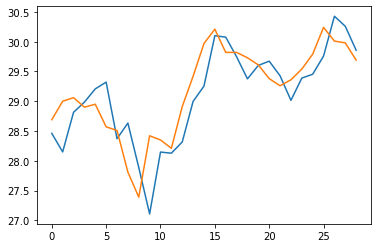

In [25]:
plt.plot(y_poly_predict)      #Comparing test predictions with actual data 
plt.plot(y_actual)            # Blue - y_test and Orange - y_actual

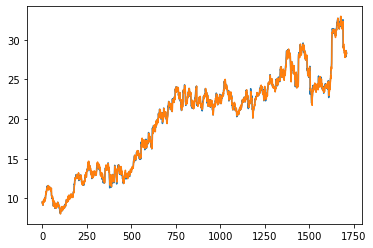

In [26]:
y_poly_train_predict = poly_model.predict(x_poly_train)
plt.plot(y_train)
plt.plot(y_poly_train_predict) # Overfitting visualization